# 决策树(Decision Tree)

决策树是一种解决分类问题的算法。决策树算法采用树形结构，使用层层推理来实现最终的分类。决策树由下面几种元素构成：

- 根节点：包含样本的全集
- 内部节点：对应特征属性测试
- 每个分支代表一个判断结果的输出
- 叶节点：代表决策的结果

预测时，在树的内部节点处用某一属性值进行判断，根据判断结果决定进入哪个分支节点，直到到达叶节点处，得到分类结果。

<img src=https://www.jcchouinard.com/wp-content/uploads/2021/11/image-1.png.webp width="40%">

任何决策树算法背后的基本思想如下:
- 使用属性选择度量(ASM)选择最佳属性来分割数据。
- 将该属性作为决策节点，并将数据集分解为更小的子集。
- 通过对每个子节点递归地重复这个过程，直到下列其中一个条件满足:
    - 所有样本数据都属于同一个类别。
    - 没有剩余的属性。
    - 没有剩余的样本数据。

**决策树的核心在于选择哪个特征来分割数据**。

- `ID3`："Iterative Dichotomiser 3"。该算法利用信息熵与信息增益作为评估候选拆分的指标。
- `C4.5`：该算法是 ID3 的后期扩展，使用信息增益率来评估决策树中的切分点。
- `CART`："Classification And Regression Tree"，该算法通常利用"基尼不纯度"来确定要拆分的最佳属性。

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_csv("./datas/watermelon3.csv")
df = df.drop('编号', axis=1)
df

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


## 属性选择度量（Attribute Selection Measures，ASM）

属性选择度量是一种启发式的选择分割准则，将数据划分为尽可能最佳的方式。它也被称为分割规则，因为它帮助我们确定给定节点上的分割点。ASM通过解释给定的数据集为每个特征(或属性)提供一个排名。最佳得分属性将被选择为分割属性(源)。在连续值属性的情况下，还需要定义分支的分割点。最常用的选择方法是**信息熵增益（Information Gain）**、**增益比（Gain Ratio)**和**基尼指数（Gini Index）**。

### 信息熵增益

香农发明了熵的概念，用来衡量数据集的不纯度（impurity)。在物理学和数学中，熵是随机变量不确定性的度量。信息熵增益就是熵的减少。信息熵增益计算基于给定属性值的数据集拆分前的熵和拆分后的平均熵之间的差值。ID3(迭代二分器)决策树算法采用信息增益。

一个数据集$T$有 $C$ 个类别，我们记 $i \in \{1,2,…,C\}$，且 $p_i$ 表示第$i$个类别在整个数据集中出现的概率，则信息熵定义为：
$$
H(T) = - \sum_{i=1}^C p_i \log p_i 
$$

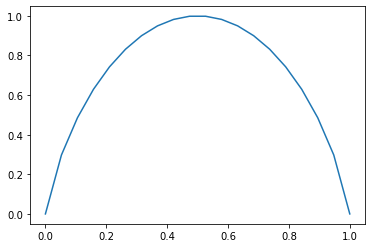

In [3]:
p0 = np.linspace(0, 1, 20)
p1 = 1 - p0
entropy = -p0 * np.log2(p0 + 1e-9) - p1 * np.log2(p1 + 1e-9)

plt.plot(p0, entropy)


从上面的例子可以看出，对于只有两个类别的数据，当两个类别数据各占一半时，熵最大，而只有一种类别时，熵为0。所以当熵越小，说明分类的纯度越高。

对于西瓜数据集，属性 `'好瓜'` 只有两类数据  `{是, 否}`，很容易统计出这两类数据的出现概率。

In [4]:
df['好瓜'].value_counts(normalize=True)

否    0.529412
是    0.470588
Name: 好瓜, dtype: float64

所以，$H(\text{'好瓜'}) = -0.53 \log_2(0.53) - 0.47 \log_2 (0.47) \simeq 0.998$。

In [5]:
def entropy(y):
    '''
    y: Pandas Series.
    '''
    p = y.value_counts(normalize=True)
    return -np.dot(p, np.log2(p))


In [6]:
entropy(df['好瓜'])

0.9975025463691153

对于一个离散的属性 $A$，有 $K$ 个可能的取值 $a^1, a^2, \cdots, a^K$，现在假设将数据集 $T$ 按属性 $A$ 进行划分，可以分成 $K$ 个不同的子集$T_1, T_2, \cdots, T_K$，那么属性 $A$ 对数据集 $T$ 划分的信息熵增益定义为：

$$
g(T, A) = H(T) - \sum_{i=1}^K \frac{|T_i|}{|T|}H(T_i) 
$$

显然，如果划分之后，每个子集的纯度越高，信息熵就越小，最终的信息熵增益就越大。

In [7]:
def information_gain_category(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    return entropy(y) - (sum(sum(x == i) * entropy(y[x == i]) for i in x.unique()) / x.shape[0])


In [8]:
information_gain_category(df['纹理'], df['好瓜'])

0.3805918973682686

对于连续的属性，其取值数目可能不再是有限的，因此，不能直接根据连续属性的可取值来对结点进行划分。此时，最简单的策略是采用二分法(bi-partition)对连续属性进行处理。

假定属性 $A$ 出现了 $n$ 个不同的取值，将这些值从小到大进行排序，记为$a^1, a^2, \cdots, a^n$，那么可以得到 $n-1$个候选划分点
$$
t_A = \{ \frac{a^i + a^{i+1}}{2} \mid 1 \le i \le n \}
$$
根据划分点 $t$ 可将数据分为两个不同的子集 $T_t^+ = \{ a | a > t\}$ 和 $T_t^- = \{ a | a \le t\}$，这样就可以计算在这种划分下的信息增益。遍历所有的划分点，可以找到信息增益最大的划分点。

In [9]:
def information_gain_numeric(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    def gain_mask(mask):
        return sum(mask) * entropy(y[mask]) + sum(-mask) * entropy(y[-mask])
    # 分割点
    x1 = x.sort_values().unique()
    split_values = (x1[:-1] + x1[1:]) / 2 if len(x1) > 1 else x1

    # 计算每个分割点的信息熵
    masks = map(lambda i: x > i, split_values)
    ig = list(map(gain_mask, masks))
    # 找到信息熵最小的分割点，信息增益最大
    min_idx = np.argmin(ig)
    return entropy(y) - ig[min_idx] / x.shape[0], split_values[min_idx]    

In [10]:
information_gain_numeric(df["密度"], df['好瓜'])

(0.2624392604045631, 0.3815)

In [11]:
def information_gain(x, y):
    if x.dtype in ['object', 'bool']:
        return information_gain_category(x, y), None, False
    gain, threshold = information_gain_numeric(x, y)
    return gain, threshold, True


对于一个数据集，计算所有属性产生的信息增益。

In [12]:
df.drop('好瓜', axis=1).apply(information_gain, y=df['好瓜'])

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率
0,0.108125,0.142675,0.140781,0.380592,0.289159,0.006046,0.262439,0.349294
1,None,None,None,None,None,None,0.3815,0.126
2,False,False,False,False,False,False,True,True


数据集按信息增益最大的属性划分为不同的子集，子集按递归的模式处理。

In [13]:
def best_split(X, y):
    '''
    X: feature, pd.DataFrame
    y: target, pd.Series
    '''
    gains = X.apply(information_gain, y = y)
    feature = gains.iloc[0].astype('float').idxmax()
    max_gain, threshold, is_numeric = gains[feature]

    return feature, threshold, max_gain, is_numeric

找到最好的划分属性。

In [14]:
best_split(df[df.columns[:-1]], df[df.columns[-1]])

('纹理', None, 0.3805918973682686, False)

In [15]:
def train(df):  # sourcery skip: extract-method
    if df.shape[1] == 0 or df.shape[0] == 1:
        return
    X = df.drop(columns=df.columns[-1], axis=1)
    y = df[df.columns[-1]]
    # 找到最佳划分
    split_feature, split_value, max_ig, is_numeric = best_split(X, y)

    # 如果信息增益为0， 表示属于同一类，不需要再划分了
    if max_ig < 1e-10 :
        print(y.value_counts().to_dict())
        print("-"*50)
        return
    
    print(f"'{split_feature}' gain : {max_ig:.3f}")
    print(y.value_counts().to_dict())

    if is_numeric:
        # 连续属性 分为两个子集
        sub1 = df[df[split_feature] > split_value]
        sub2 = df[df[split_feature] <= split_value]
        display(f"{split_feature} > {split_value}", sub1)
        train(sub1)
        display(f"{split_feature} <= {split_value}", sub2)
        train(sub2)
    else:
        # 离散属性 分为有限个子集
        for value in df[split_feature].unique():
            sub = df[df[split_feature] == value].drop(split_feature, axis=1)
            display(f"{split_feature} = {value}", sub)
            train(sub)

In [16]:
train(df)

'纹理' gain : 0.381
{'否': 9, '是': 8}


'纹理 = 清晰'

,色泽,根蒂,敲声,脐部,触感,密度,含糖率,好瓜
0,青绿,蜷缩,浊响,凹陷,硬滑,0.697,0.460,是
1,乌黑,蜷缩,沉闷,凹陷,硬滑,0.774,0.376,是
2,乌黑,蜷缩,浊响,凹陷,硬滑,0.634,0.264,是
3,青绿,蜷缩,沉闷,凹陷,硬滑,0.608,0.318,是
4,浅白,蜷缩,浊响,凹陷,硬滑,0.556,0.215,是
5,青绿,稍蜷,浊响,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍凹,硬滑,0.437,0.211,是
9,青绿,硬挺,清脆,平坦,软粘,0.243,0.267,否
14,乌黑,稍蜷,浊响,稍凹,软粘,0.360,0.370,否


'密度' gain : 0.764
{'是': 7, '否': 2}


'密度 > 0.3815'

,色泽,根蒂,敲声,脐部,触感,密度,含糖率,好瓜
0,青绿,蜷缩,浊响,凹陷,硬滑,0.697,0.460,是
1,乌黑,蜷缩,沉闷,凹陷,硬滑,0.774,0.376,是
2,乌黑,蜷缩,浊响,凹陷,硬滑,0.634,0.264,是
3,青绿,蜷缩,沉闷,凹陷,硬滑,0.608,0.318,是
4,浅白,蜷缩,浊响,凹陷,硬滑,0.556,0.215,是
5,青绿,稍蜷,浊响,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍凹,硬滑,0.437,0.211,是


{'是': 7}
--------------------------------------------------


'密度 <= 0.3815'

,色泽,根蒂,敲声,脐部,触感,密度,含糖率,好瓜
9,青绿,硬挺,清脆,平坦,软粘,0.243,0.267,否
14,乌黑,稍蜷,浊响,稍凹,软粘,0.360,0.370,否


{'否': 2}
--------------------------------------------------


'纹理 = 稍糊'

,色泽,根蒂,敲声,脐部,触感,密度,含糖率,好瓜
6,乌黑,稍蜷,浊响,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,沉闷,稍凹,硬滑,0.666,0.091,否
12,青绿,稍蜷,浊响,凹陷,硬滑,0.639,0.161,否
13,浅白,稍蜷,沉闷,凹陷,硬滑,0.657,0.198,否
16,青绿,蜷缩,沉闷,稍凹,硬滑,0.719,0.103,否


'触感' gain : 0.722
{'否': 4, '是': 1}


'触感 = 软粘'

,色泽,根蒂,敲声,脐部,密度,含糖率,好瓜
6,乌黑,稍蜷,浊响,稍凹,0.481,0.149,是


'触感 = 硬滑'

,色泽,根蒂,敲声,脐部,密度,含糖率,好瓜
8,乌黑,稍蜷,沉闷,稍凹,0.666,0.091,否
12,青绿,稍蜷,浊响,凹陷,0.639,0.161,否
13,浅白,稍蜷,沉闷,凹陷,0.657,0.198,否
16,青绿,蜷缩,沉闷,稍凹,0.719,0.103,否


{'否': 4}
--------------------------------------------------


'纹理 = 模糊'

,色泽,根蒂,敲声,脐部,触感,密度,含糖率,好瓜
10,浅白,硬挺,清脆,平坦,硬滑,0.245,0.057,否
11,浅白,蜷缩,浊响,平坦,软粘,0.343,0.099,否
15,浅白,蜷缩,浊响,平坦,硬滑,0.593,0.042,否


{'否': 3}
--------------------------------------------------


## Gain Ratio

信息增益对取值较多的属性比较偏好。分支度越高的离散变量往往子节点的总信息熵会更小，极限情况下取编号作为切分字段，每个分类的纯度都是100%，因此这样的分类方式是没有效益的。

In [17]:
df = pd.read_csv("./datas/watermelon3.csv")
df['编号'] = df['编号'].astype('object')
df

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,0.243,0.267,否


In [18]:
df.drop('好瓜', axis=1).apply(information_gain, y=df['好瓜'])

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率
0,0.997503,0.108125,0.142675,0.140781,0.380592,0.289159,0.006046,0.262439,0.349294
1,None,None,None,None,None,None,None,0.3815,0.126
2,False,False,False,False,False,False,False,True,True


信息熵增益比通过引入一个称为本征信息(Intrinsic information, II)的归一化术语来减少信息增益对高分支预测器的偏差。本征信息(II)被定义为子数据集比例的熵。

$$
\mathrm{II} = \sum_{i=1}^K \frac{|T_i|}{|T|}\log(\frac{|T_i|}{|T|})
$$
$$
g_{ratio}(T, A) = \frac{g(T, A)}{\mathrm{II}}
$$

In [19]:
def information_gain_ratio_category(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    m = y.shape[0]
    values = x.unique()
    ig = 0
    ii = 0
    for value in values:
        mask = x == value
        ig += sum(mask) / m * entropy(y[mask])
        ii -= sum(mask) / m * np.log2(sum(mask) / m)
    return (entropy(y) - ig) / ii


def information_gain_ratio_numeric(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    m = x.shape[0]

    ig_max = 0

    x1 = x.sort_values().unique()
    cut_points = (x1[:-1] + x1[1:]) / 2
    split_value = 0

    for cut_point in cut_points:
        mask = x > cut_point
        a = sum(mask)
        b = m - a
        ig = (a/m) * entropy(y[mask]) + (b/m) * entropy(y[-mask])
        ii = -(a/m) * np.log2(a/m) - (b/m) * np.log2(b/m)
        ig_ratio = (entropy(y) - ig) / ii
        
        if ig_max < ig_ratio:
            ig_max = ig_ratio
            split_value = cut_point

    return ig_max, split_value

def information_gain_ratio(x, y):
    if x.dtype in ['object', 'bool']:
        return information_gain_ratio_category(x, y), None, False
    ig, value = information_gain_ratio_numeric(x, y)
    return ig, value, True


In [20]:
df.drop('好瓜', axis=1).apply(information_gain_ratio, y=df['好瓜'])

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率
0,0.24404,0.06844,0.101759,0.105627,0.263085,0.186727,0.006918,0.333414,0.399658
1,None,None,None,None,None,None,None,0.3815,0.126
2,False,False,False,False,False,False,False,True,True


### 基尼指数
CART (Classification and Regression Tree)算法采用基尼指数作为分割规则。数据集 $T$ 的基尼值是
$$
I_G(p)=\sum_{i=1}^C p_i\left(1-p_i\right)=1-\sum_{i=1}^C p_i{ }^2
$$
$p_i$表示第$i$类出现的概率，$1-p_i$表示第$i$类不出现的概率。

那么，和信息增益一样，属性A划分的基尼指数定义为
$$
gini(T, A) = \sum_{i=1}^K \frac{|T_i|}{|T|}I_G(T_i) 
$$

In [21]:
def gini(y):
    '''
    y: Pandas Series.
    '''
    p = y.value_counts(normalize=True)
    return 1 - np.sum(p**2)

In [22]:
def gini_category(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    return (sum(sum(x == i) * gini(y[x == i]) for i in x.unique()) / x.shape[0])


def gini_numeric(x, y):
    '''
    x: feature, pd.Series
    y: target, pd.Series
    '''
    def gini_mask(mask):
        return sum(mask) * gini(y[mask]) + sum(-mask) * gini(y[-mask])
    # 分割点
    x1 = x.sort_values().unique()
    if len(x1) == 1:
        return gini(y), x1[0]
    split_values = (x1[:-1] + x1[1:]) / 2

    masks = map(lambda i: x > i, split_values)
    ig = list(map(gini_mask, masks))
    min_idx = np.argmin(ig)
    return ig[min_idx] / x.shape[0], split_values[min_idx]
    

def gini_index(x, y):
    if x.dtype in ['object', 'bool']:
        return gini_category(x, y), None, False
    ig, value = gini_numeric(x, y)
    return ig, value, True


In [23]:
df.drop('好瓜', axis=1).apply(gini_index, y=df['好瓜'])

,编号,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率
0,0.0,0.427451,0.422269,0.423529,0.277124,0.344538,0.494118,0.361991,0.285948
1,None,None,None,None,None,None,None,0.3815,0.2045
2,False,False,False,False,False,False,False,True,True


## 封装

把上面的方法可以封装成一个决策树的类。

In [24]:
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature = 0
        self.thresholds = 0
        self.gain = 0
        self.left = None
        self.right = None


class DecisionTreeClassifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._build_tree(X, y)

    def predict(self, X):
        return X.apply(self._predict, axis=1)

    def _entropy(self, y):
        p = y.value_counts(normalize=True)
        return -np.dot(p, np.log2(p))

    def _information_gain(self, x, y):

        def gain_mask(mask):
            return sum(mask) * entropy(y[mask]) + sum(-mask) * entropy(y[-mask])
        
        x1 = x.sort_values().unique()
        split_values = (x1[:-1] + x1[1:]) / 2 if len(x1) > 1 else x1

        masks = map(lambda i: x > i, split_values)
        ig = list(map(gain_mask, masks))
        min_idx = np.argmin(ig)

        return entropy(y) - ig[min_idx] / x.shape[0], split_values[min_idx]

    def _gini(self, y):
        p = y.value_counts(normalize=True)
        return 1 - np.sum(p**2)

    def _gini_index(self, x, y):

        def gini_mask(mask):
            return sum(mask) * gini(y[mask]) + sum(-mask) * gini(y[-mask])
        # 分割点
        x1 = x.sort_values().unique()
        if len(x1) == 1:
            return gini(y), x1[0]
        split_values = (x1[:-1] + x1[1:]) / 2

        masks = map(lambda i: x > i, split_values)
        ig = list(map(gini_mask, masks))
        min_idx = np.argmin(ig)
        return ig[min_idx] / x.shape[0], split_values[min_idx]

    def _best_split(self, X, y):
        mask = X.apply(self._information_gain, y=y)
        split_feature = mask.iloc[0].astype('float').idxmax()
        gain, split_value = mask[split_feature]

        return split_feature, split_value, gain

    def _build_tree(self, X, y, depth=0):
        predicted_class = y.value_counts().idxmax()
        node = Node(predicted_class=predicted_class)
        #同一类
        if len(y.unique()) == 1:
            return node
        # 找到最佳分割属性
        node.feature, node.thresholds, node.gain = self._best_split(X, y)
        # 如果层数过深
        if depth < self.max_depth:
            mask = X[node.feature] > node.thresholds
            X_left, y_left = X[mask], y[mask]
            X_right, y_right = X[-mask], y[-mask]
            node.left = self._build_tree(X_left, y_left, depth + 1)
            node.right = self._build_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, x):
        node = self.tree_
        while node.left:
            node = node.left if x[node.feature] > node.thresholds else node.right
        return node.predicted_class
    
    def accuracy(self, X, y):
        return np.mean(self.predict(X) == y)
    
    def print_tree(self, root, space=0, LEVEL_SPACE=10):
        if root is None:
            return
        space += LEVEL_SPACE
        self.print_tree(root.right, space)
        # print() # neighbor space
        for _ in range(LEVEL_SPACE, space):
            print(end=" ")
        if root.left is None and root.right is None:
            print(f"{root.predicted_class}")
        else:
            print(f"|{root.feature}>{root.thresholds:.3f}:{root.gain:.2f}|<")
        self.print_tree(root.left, space)



In [25]:
df = pd.read_csv("./datas/watermelon3.csv")
from sklearn.preprocessing import LabelEncoder
categorical_columns = df.select_dtypes(include="object").columns
numerical_columns = df.select_dtypes(include=np.number).columns
df1 = df[categorical_columns[:-1]].apply(LabelEncoder().fit_transform)
df1[numerical_columns] = df[numerical_columns]
df1["好瓜"] = df['好瓜']
df1.drop('编号', axis=1, inplace=True)
display(df1)

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
0,2,2,1,1,0,0,0.697,0.460,是
1,0,2,0,1,0,0,0.774,0.376,是
2,0,2,1,1,0,0,0.634,0.264,是
3,2,2,0,1,0,0,0.608,0.318,是
4,1,2,1,1,0,0,0.556,0.215,是
5,2,1,1,1,2,1,0.403,0.237,是
6,0,1,1,2,2,1,0.481,0.149,是
7,0,1,1,1,2,0,0.437,0.211,是
8,0,1,0,2,2,0,0.666,0.091,否
9,2,0,2,1,1,1,0.243,0.267,否


In [26]:
mytree = DecisionTreeClassifier(max_depth=10)
mytree.fit(df1.drop(df.columns[-1], axis=1), df1[df.columns[-1]])
mytree.print_tree(mytree.tree_, LEVEL_SPACE=20)
mytree.accuracy(df1.drop(df.columns[-1], axis=1), df1[df.columns[-1]])

                    否
|含糖率>0.126:0.35|<
                                        否
                              |脐部>1.500:0.52|<
                                                  否
                                        |密度>0.382:0.81|<
                                                  是
                    |根蒂>1.500:0.34|<
                              是


1.0

DecisionTreeClassifier(criterion='entropy')

<Figure size 2000x1200 with 0 Axes>

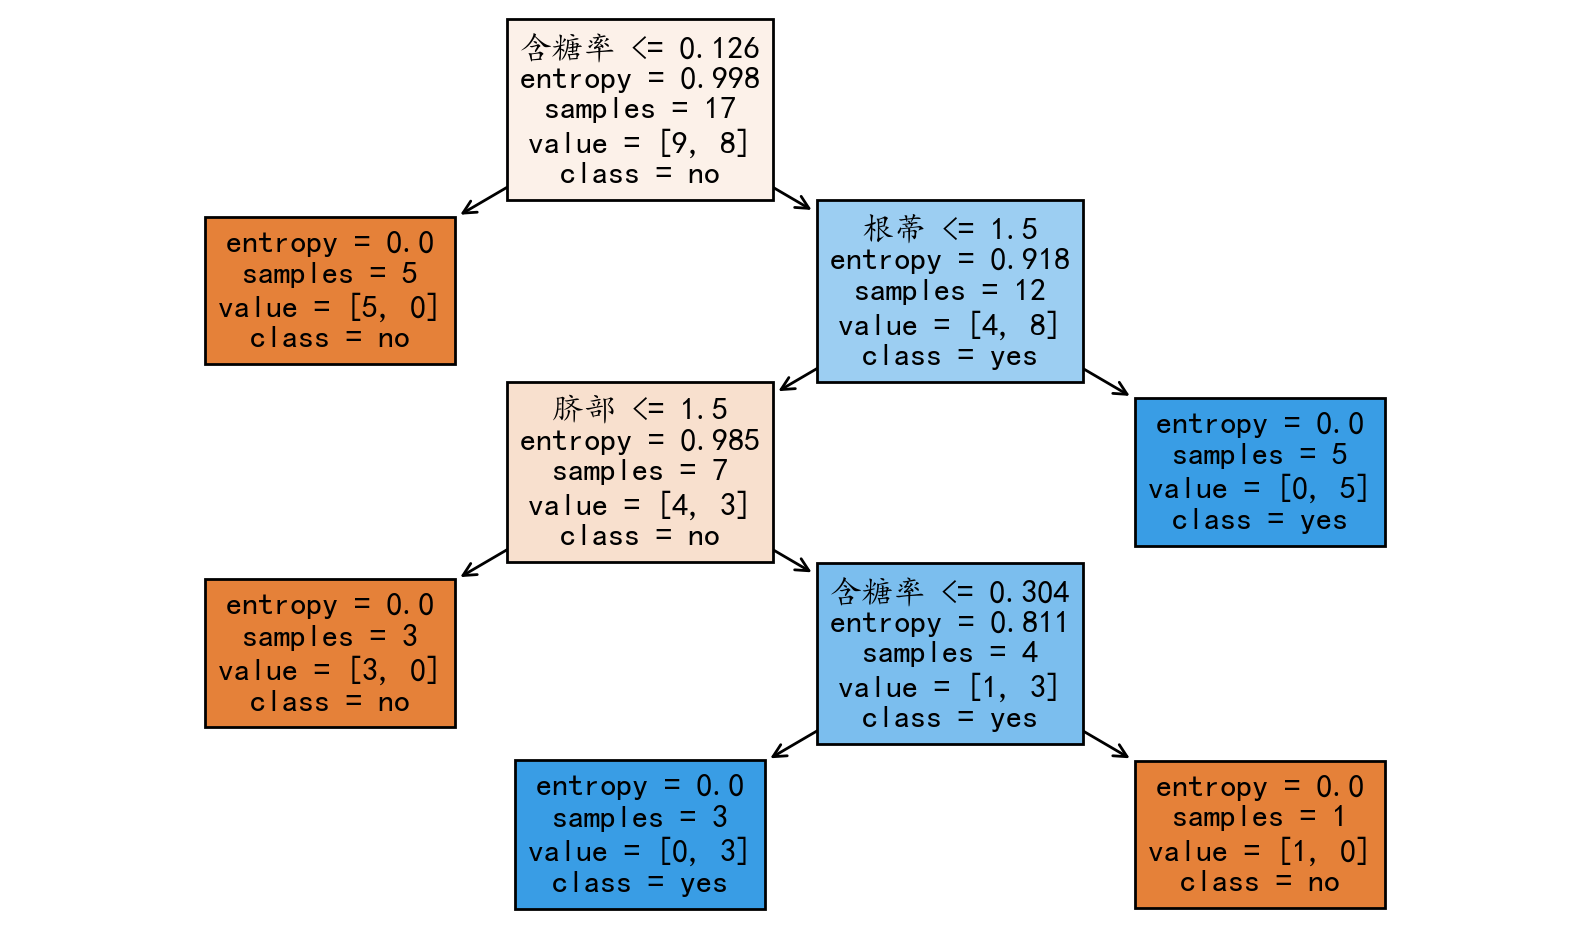

In [27]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(df1.drop(df.columns[-1], axis=1), df1[df.columns[-1]])

plt.figure(figsize=(10,6), dpi=200)
plt.rcParams['font.sans-serif']=['KaiTi'] 
_ = tree.plot_tree(clf,filled = True, feature_names=df1.columns, class_names=["no", "yes"])
plt.show()

## scikit-learn 决策树

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
```

参数
- 特征选择标准`criterion`

    可以使用`"gini"`或者`"entropy"`，前者代表基尼系数，后者代表信息增益。一般说使用默认的基尼系数`"gini"`就可以了，即`CART`算法。除非你更喜欢类似`ID3`, `C4.5`的最优特征选择方法。 

- 特征划分点选择标准`splitter`

    可以使用`"best"`或者`"random"`。前者在特征的所有划分点中找出最优的划分点。后者是随机的在部分划分点中找局部最优的划分点。

    默认的`"best"`适合样本量不大的时候，而如果样本数据量非常大，此时决策树构建推荐`"random"`。 

- 划分时考虑的最大特征数`max_features`

    可以使用很多种类型的值，默认是 `"None"`，意味着划分时考虑所有的特征数；如果是`"log2"`意味着划分时最多考虑 $\log_2 N$ 个特征；如果是`"sqrt"`或者`"auto"`意味着划分时最多考虑 $\sqrt{N}$ 个特征。如果是整数，代表考虑的特征绝对数。如果是浮点数，代表考虑特征百分比，即考虑（$N*a\%$）取整后的特征数。其中 $N$ 为样本总特征数。

    一般来说，如果样本特征数不多，比如小于50，我们用默认的`"None"`就可以了，如果特征数非常多，我们可以灵活使用刚才描述的其他取值来控制划分时考虑的最大特征数，以控制决策树的生成时间。

- 决策树最大深度`max_depth`

    决策树的最大深度，默认可以不输入，如果不输入的话，决策树在建立子树的时候不会限制子树的深度。一般来说，数据少或者特征少的时候可以不管这个值。如果模型样本量多，特征也多的情况下，推荐限制这个最大深度，具体的取值取决于数据的分布。常用的可以取值10-100之间。

- 内部节点再划分所需最小样本数 `min_samples_split`

    这个值限制了子树继续划分的条件，如果某节点的样本数少于 `min_samples_split`，则不会继续再尝试选择最优特征来进行划分。 默认是2。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

- 叶子节点最少样本数`min_samples_leaf`

    这个值限制了叶子节点最少的样本数，如果某叶子节点数目小于样本数，则会和兄弟节点一起被剪枝。 默认是1,可以输入最少的样本数的整数，或者最少样本数占样本总数的百分比。如果样本量不大，不需要管这个值。如果样本量数量级非常大，则推荐增大这个值。

- 叶子节点最小的样本权重和`min_weight_fraction_leaf`

    这个值限制了叶子节点所有样本权重和的最小值，如果小于这个值，则会和兄弟节点一起被剪枝。 默认是0，就是不考虑权重问题。一般来说，如果有较多样本有缺失值，或者分类树样本的分布类别偏差很大，就会引入样本权重，这时就要注意这个值了。

- 最大叶子节点数`max_leaf_nodes`

    通过限制最大叶子节点数，可以防止过拟合，默认是`"None"`，即不限制最大的叶子节点数。如果加了限制，算法会建立在最大叶子节点数内最优的决策树。如果特征不多，可以不考虑这个值，但是如果特征分成多的话，可以加以限制，具体的值可以通过交叉验证得到。

- 类别权重`class_weight`

    指定样本各类别的的权重，主要是为了防止训练集某些类别的样本过多，导致训练的决策树过于偏向这些类别。这里可以自己指定各个样本的权重，或者用`"balanced"`，如果使用 `"balanced"`，则算法会自己计算权重，样本量少的类别所对应的样本权重会高。当然，如果你的样本类别分布没有明显的偏倚，则可以不管这个参数，选择默认的`"None"`。

- 节点划分最小不纯度`min_impurity_split`

    这个值限制了决策树的增长，如果某节点的不纯度(基尼系数，信息增益，均方差，绝对差)小于这个阈值，则该节点不再生成子节点。即为叶子节点。

- 数据是否预排序`presort`

    这个值是布尔值，默认是`False`不排序。一般来说，如果样本量少或者限制了一个深度很小的决策树，设置为`True`可以让划分点选择更加快，决策树建立的更加快。如果样本量太大的话，反而没有什么好处。

属性

- `classes_`     
    类标签（单输出问题）或类标签数组的列表（多输出问题）。
    
- `feature_importances_`	    
    返回特征重要程度数据。
- `max_features_`	    
  	max_features 的推断值。

- `n_classes_`		    
    整数的类别数（单输出问题），或者一个包含所有类别数量的列表（多输出问题）。

- `n_features_`	    
  	执行模型拟合训练时的特征数量。

- `n_outputs_`	  
    执行模型拟合训练时的输出数量。

- `tree_`	  
    基础的Tree对象。

方法

- apply(X[, check_input])	  
  返回每个叶子节点上被预测样本的索引。
  
- cost_complexity_pruning_path(X, y[, …])	  
  在最小化成本复杂性修剪期间计算修剪路径 。

- decision_path(X[, check_input])	  
  返回决策树的决策路径。

- fit(X, y[, sample_weight, check_input, …])	  
  根据训练集（X，y）建立决策树分类器。

- get_depth() 	  
  返回决策树的深度。
    
- get_n_leaves()  
  返回决策树的叶子数。

- get_params([deep])	  
  获取此估算器的参数。

- predict(X[, check_input])	  
  预测X的类别或回归值。

- predict_log_proba(X)	  
  预测输入样本X的类对数概率。

- predict_proba(X[, check_input])	  
  预测输入样本X的类别概率。
  
- score(X, y[, sample_weight])	  
  返回给定测试数据和标签上的平均准确度。

- set_params(**params)	  
  设置此估算器的参数。

***
除了这些参数要注意以外，其他在调参时的注意点有：

1. 当样本少数量但是样本特征非常多的时候，决策树很容易过拟合，一般来说，样本数比特征数多一些会比较容易建立健壮的模型

2. 如果样本数量少但是样本特征非常多，在拟合决策树模型前，推荐先做维度规约，比如主成分分析（PCA），特征选择（Losso）或者独立成分分析（ICA）。这样特征的维度会大大减小。再来拟合决策树模型效果会好。

3. 推荐多用决策树的可视化，同时先限制决策树的深度（比如最多3层），这样可以先观察下生成的决策树里数据的初步拟合情况，然后再决定是否要增加深度。

4. 在训练模型先，注意观察样本的类别情况，如果类别分布非常不均匀，就要考虑用class_weight来限制模型过于偏向样本多的类别。

***

### scikit-learn决策树可视化

```python
sklearn.tree.plot_tree(decision_tree, *, max_depth=None, feature_names=None, class_names=None, label='all', filled=False, impurity=True, node_ids=False, proportion=False, rounded=False, precision=3, ax=None, fontsize=None)
```

参数

- `decision_tree`	  
    要绘制的决策树。

- `max_depth`-----int, optional (default=None)  
    表示的最大深度。如果为None，则完全生成树。

- `feature_names`-----	list of strings, optional (default=None)	  
    每个特征的名称。

- `class_names`-----	list of strings, bool or None, optional (default=None)	  
    每个目标类别的名称按升序排列。仅与分类相关，不支持多输出。如果为True，则显示类名的符号表示。

- `label`-----	{‘all’, ‘root’, ‘none’}, optional (default=’all’)	  
    是否显示杂质的信息性标签等。选项包括“all”显示在每个节点上，“root”显示在顶部根节点上或“none”显示在任何节点上。
  
- `filled`-----	bool, optional (default=False)	  
    设置为True时，绘制节点以表示多数类用于分类，值的极值用于回归，或表示节点的纯度用于多输出。

- `impurity`-----	bool, optional (default=True)	  
    设置为True时，显示每个节点上的杂质。

- `node_ids`-----	bool, optional (default=False)	  
    设置为True时，显示每个节点上的ID号。

- `proportion`-----	bool, optional (default=False)	  
    设置为True时，将‘values’和/或‘samples’的显示分别更改为比例和百分比。

- `rounded`	-----bool, optional (default=False)	  
    设置为True时，绘制带有圆角的节点框，并使用Helvetica字体代替Times-Roman。

- `precision`-----	int, optional (default=3)	  
    每个节点的不纯度的浮点数的精度位数、阈值和值属性。

- `ax`-----	matplotlib axis, optional (default=None)	  
    要绘制的轴。如果为None，则使用当前轴。以前的所有内容均被清除。

- `fontsize`-----	int, optional (default=None)	  
    文字字体大小。如果没有，则自动确定适合的数值。

DecisionTreeClassifier(criterion='entropy')

train accuracy: 1.0
test accuracy: 1.0


<Figure size 3600x2400 with 0 Axes>

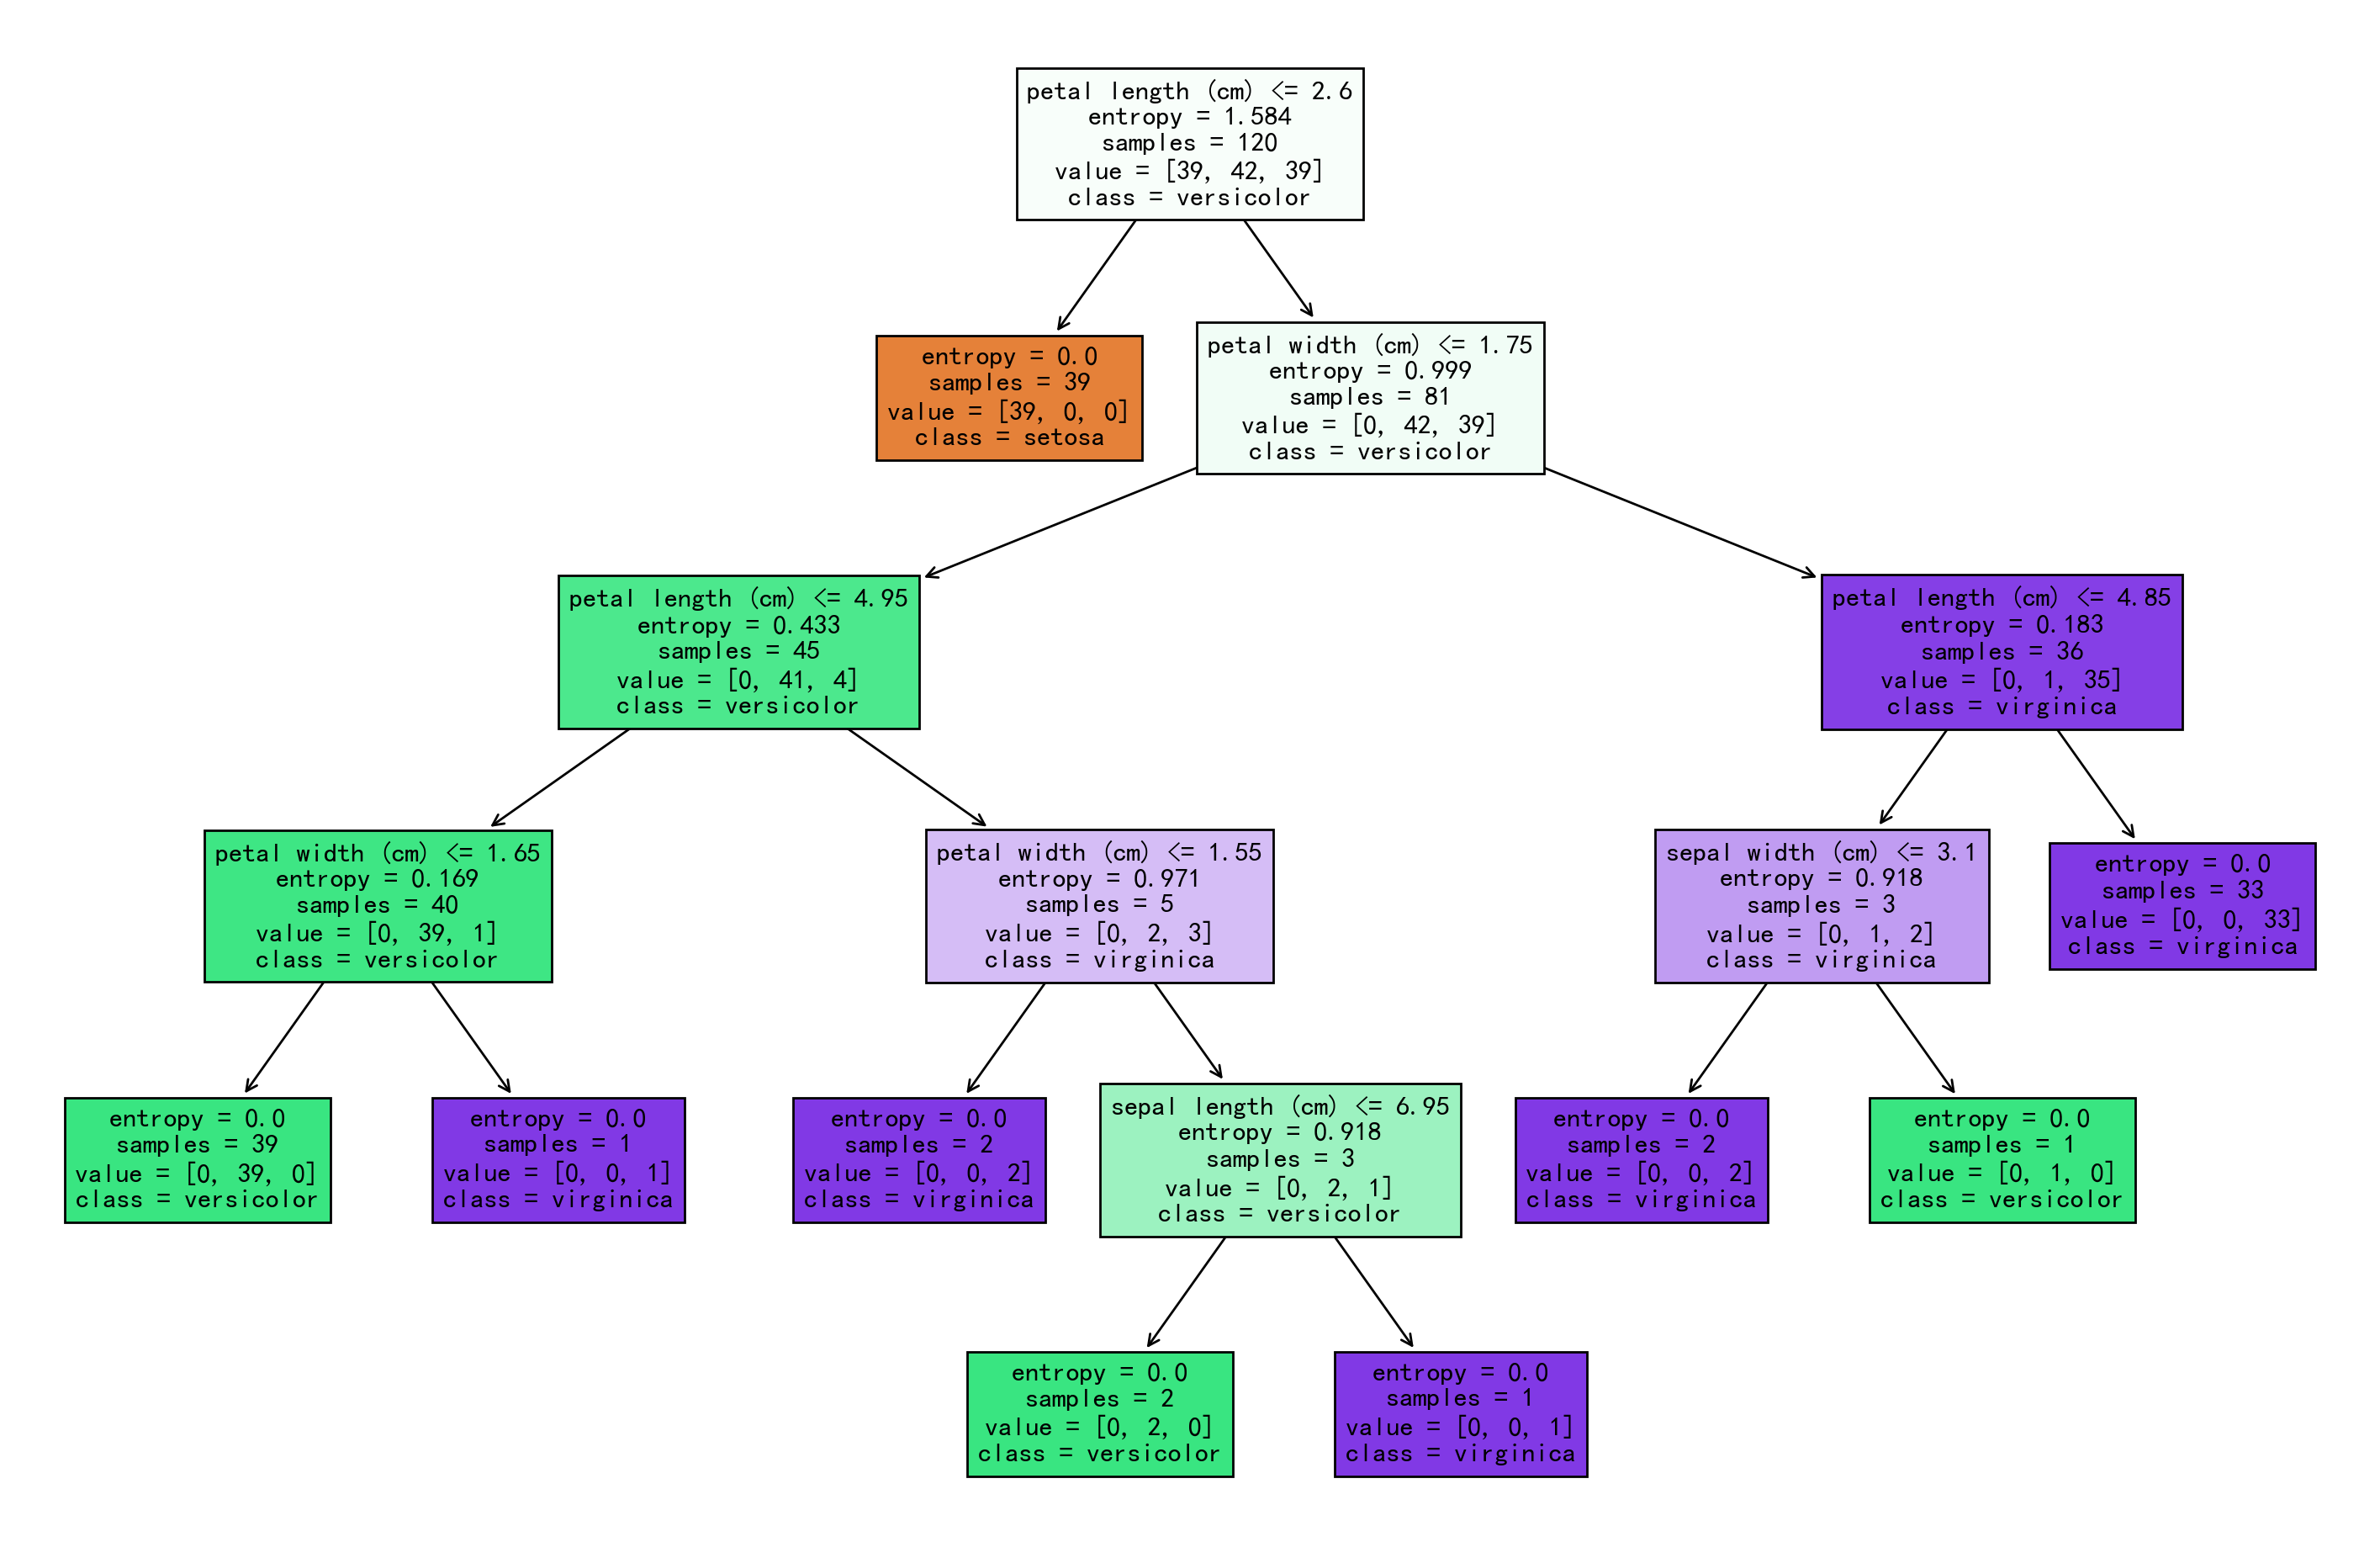

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
# 导入数据
iris = load_iris()
X = iris['data']
y = iris['target']
feature_names = iris.feature_names

# 划分数据
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1024)

# 决策树实例化、拟合、预测
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_ = clf.predict(X_test)

print("train accuracy:", clf.score(X_train, y_train))
print("test accuracy:", clf.score(X_test, y_test))
# 指定图幅大小
plt.figure(figsize=(18, 12), dpi=200)

# 绘制图像
_ = tree.plot_tree(clf, filled=True, feature_names=feature_names,
                   class_names=iris.target_names)
plt.show()


,feature importances
sepal length (cm),0.014493
sepal width (cm),0.014493
petal length (cm),0.635907
petal width (cm),0.335108


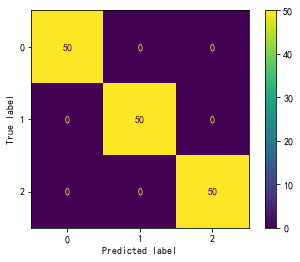

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay
display(pd.DataFrame(data=clf.feature_importances_, index=iris.feature_names, columns=['feature importances']))
ConfusionMatrixDisplay.from_estimator(clf, X, y)

## 决策树剪枝

决策树学习采用贪心搜索 (greedy search) 来识别决策树内的最佳分割点。然后以自上而下的回归方式重复此拆分过程，直到所有或者大多数记录都标记为特定的类别标签。是否将所有数据点归为同类子集在很大程度上取决于决策树的复杂性。较小的决策树更容易获得无法分裂的叶节点，即单个类别中的数据点。然而，决策树的体量越来越大，就会越来越难保持这种纯度，并且通常会导致落在给定子树内的数据过少。这种情况被称为数据碎片，通常会引起数据过拟合。

为了降低复杂性并防止过拟合，通常采用剪枝（pruning）算法；这一过程会删除不太重要的特征的分支。然后，通过交叉验证评估模型的拟合。另一种保持决策树准确性的方法是使用随机森林算法形成一个集合；这种分类法可以得到更加准确的预测结果，特别是在决策树分支彼此不相关的情况下。

决策树的剪枝有两种思路：

- 预剪枝（Pre-Pruning）
- 后剪枝（Post-Pruning）


### 预剪枝

预剪枝就是在构造决策树的过程中，先对每个结点在划分前进行估计，如果当前结点的划分不能带来决策树模型泛化性能的提升，则不对当前结点进行划分并且将当前结点标记为叶结点。

所有决策树的构建方法，都是在无法进一步降低熵的情况下才会停止创建分支的过程，为了避免过拟合，可以设定一个阈值，熵减小的数量小于这个阈值，即使还可以继续降低熵，也停止继续创建分支。但是这种方法实际中的效果并不好。

决策树模型的剪枝操作主要会用到DecisionTreeClassifier()函数中的

- max_depth：指定了决策树的最大深度
- max_leaf_nodes：指定了模型的叶子节点的最大数目
- min_sample_split：指定了模型的节点允许分割的最小样本数
- min_samples_leaf：指定了模型的一个叶节点上所需的最小样本数

### 后剪枝

决策树构造完成后进行剪枝。剪枝的过程是对拥有同样父节点的一组节点进行检查，判断如果将其合并，熵的增加量是否小于某一阈值。如果确实小，则这一组节点可以合并一个节点，其中包含了所有可能的结果。后剪枝是目前最普遍的做法。

后剪枝的剪枝过程是删除一些子树，然后用其叶子节点代替，这个叶子节点所标识的类别通过大多数原则(majority class criterion)确定。所谓大多数原则，是指剪枝过程中, 将一些子树删除而用叶节点代替，这个叶节点所标识的类别用这棵子树中大多数训练样本所属的类别来标识，所标识的类称为`majority class` 。

后剪枝算法有很多种，主要有：

- Reduced-Error Pruning(REP)
- Pesimistic-Error Pruning(PEP)
- Cost-Complexity Pruning(CCP)

## 决策树优缺点
优点：

1. 简单直观，生成的决策树很直观，可解释性强。

2. 基本不需要预处理，不需要提前归一化，处理缺失值。

3. 使用决策树预测的代价是 $O(\log m)$。

4. 既可以处理离散值也可以处理连续值。很多算法只是专注于离散值或者连续值。

缺点:

1. 决策树算法非常容易过拟合，导致泛化能力不强。可以通过设置节点最少样本数量和限制决策树深度来改进。

2. 决策树会因为样本发生一点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习之类的方法解决。

3. 寻找最优的决策树是一个NP难的问题，一般是通过启发式方法，容易陷入局部最优。
